### 1. Install `bio-check`. This tooling can be accessed on PyPI:

In [ ]:
!pip install bio-check

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 11.6 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


### 2. Import the verifier tooling object:

In [ ]:
from bio_check import Verifier

verifier = Verifier()

{'bio-check-message': 'Hello from the Verification Service API!'}


### 3a: Submit a new verification job using a sbml file and time params:

Upload a sbml file to colab and use it to make submit a new job. Skip this step if you are using this notebook locally.

In [ ]:
from google.colab import files

print('Please upload a sbml file')
files.upload()

Please upload a sbml file


Saving BIOMD0000000012_url.xml to BIOMD0000000012_url.xml


{'BIOMD0000000012_url.xml': b'<?xml version="1.0" encoding="UTF-8"?>\n<sbml xmlns="http://www.sbml.org/sbml/level2/version3" metaid="_153818" level="2" version="3">\n  <model metaid="_000001" id="BIOMD0000000012" name="Elowitz2000 - Repressilator">\n    <notes>\n      <body xmlns="http://www.w3.org/1999/xhtml">\n        <div class="dc:title">Elowitz2000 - Repressilator</div>\n        <div class="dc:description">\n          <p>This model describes the deterministic version of the repressilator system.</p>\n          <p>The authors of this model (see reference) use three transcriptional repressor systems that are not part of any natural biological clock to build an oscillating network that they called the repressilator. The model system was induced in Escherichia coli.</p>\n          <p>In this system, LacI (variable X is the mRNA, variable PX is the protein) inhibits the tetracycline-resistance transposon tetR (Y, PY describe mRNA and protein). Protein tetR inhibits the gene Cl from pha

Declare request params for new verification job

In [ ]:
sbml_fp = '/content/BIOMD0000000012_url.xml'
include_outputs = True
comparison_id = 'test_sbml0'
simulators = ['copasi', 'tellurium']

output_start = 400
output_end = 1000
num_points = 600

import os
os.path.exists(sbml_fp)

True

Submit a new job, returning all observables

In [ ]:
sbml_submission1 = verifier.verify_sbml(
    sbml_filepath=sbml_fp,
    simulators=simulators,
    include_outputs=True,
    comparison_id=comparison_id,
    start=output_start,
    end=output_end,
    steps=num_points
)

View the submission

In [ ]:
sbml_submission1

{'job_id': 'test_sbml0_8c372cd4-8f2b-447a-8e89-4068475bafcf',
 'status': 'PENDING',
 'timestamp': '2024-08-02 21:06:17.568899',
 'comparison_id': 'test_sbml0',
 'path': 'uploads/test_sbml0_8c372cd4-8f2b-447a-8e89-4068475bafcf/BIOMD0000000012_url.xml',
 'start': 400,
 'end': 1000,
 'steps': 600,
 'simulators': ['copasi,tellurium'],
 'include_output': True,
 'rTol': None,
 'aTol': None,
 'selection_list': None}

Use the job id generated above to asynchronously fetch the job result

In [ ]:
job_id = sbml_submission1['job_id']
comparison_result = verifier.get_verify_output(job_id)

In [ ]:
from pprint import pp

pp(comparison_result)

Streaming output truncated to the last 5000 lines.
                                                                                    0.15133329534990506,
                                                                                    0.15918337415611414,
                                                                                    0.1682413844581356,
                                                                                    0.17867763568339456,
                                                                                    0.19068742233034253,
                                                                                    0.20449440177789982,
                                                                                    0.22035438077339461,
                                                                                    0.23855969564741777,
                                                                                    0.25944416069337867,
     

### 4a. Visualize simulator outputs. Use the `"simulators"` -based hue for line-color.

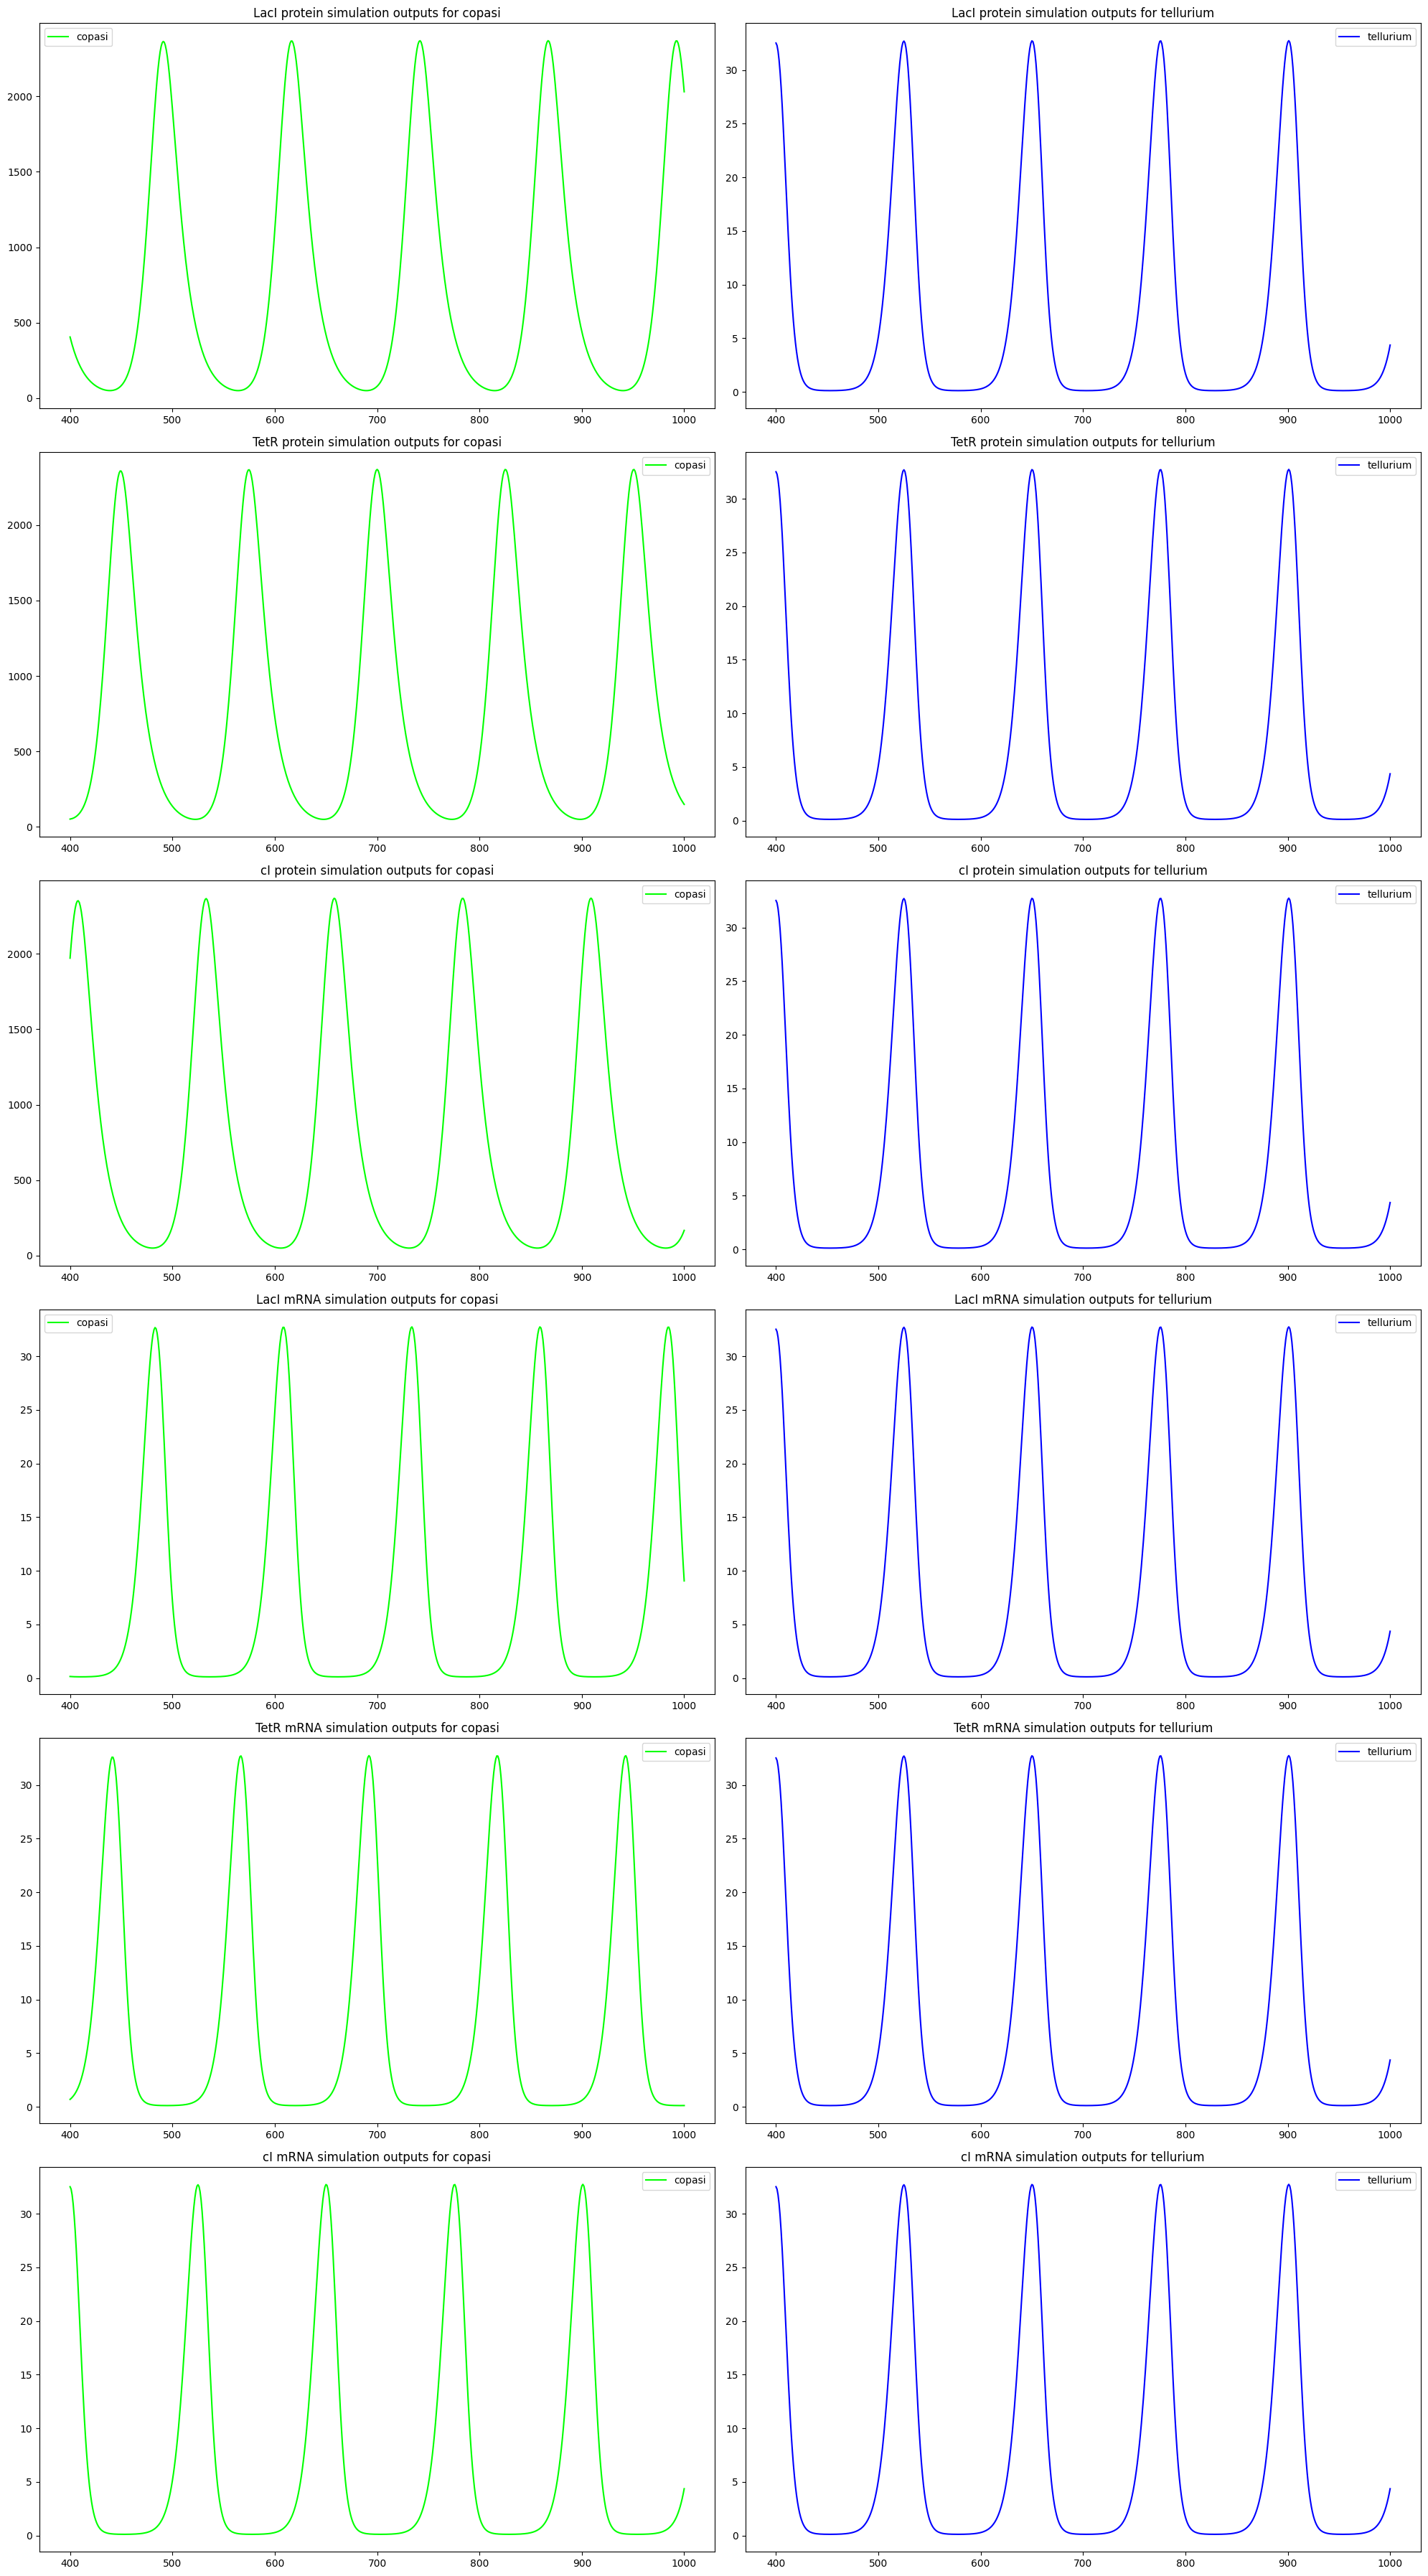

In [ ]:
output_plots_simulator_hue = verifier.visualize_outputs(
    data=comparison_result,
    simulators=simulators,
    output_start=400,
    output_end=1000,
    num_points=600,
    hue='simulators'
)

### Same visualization, but using the `"species"` hue.

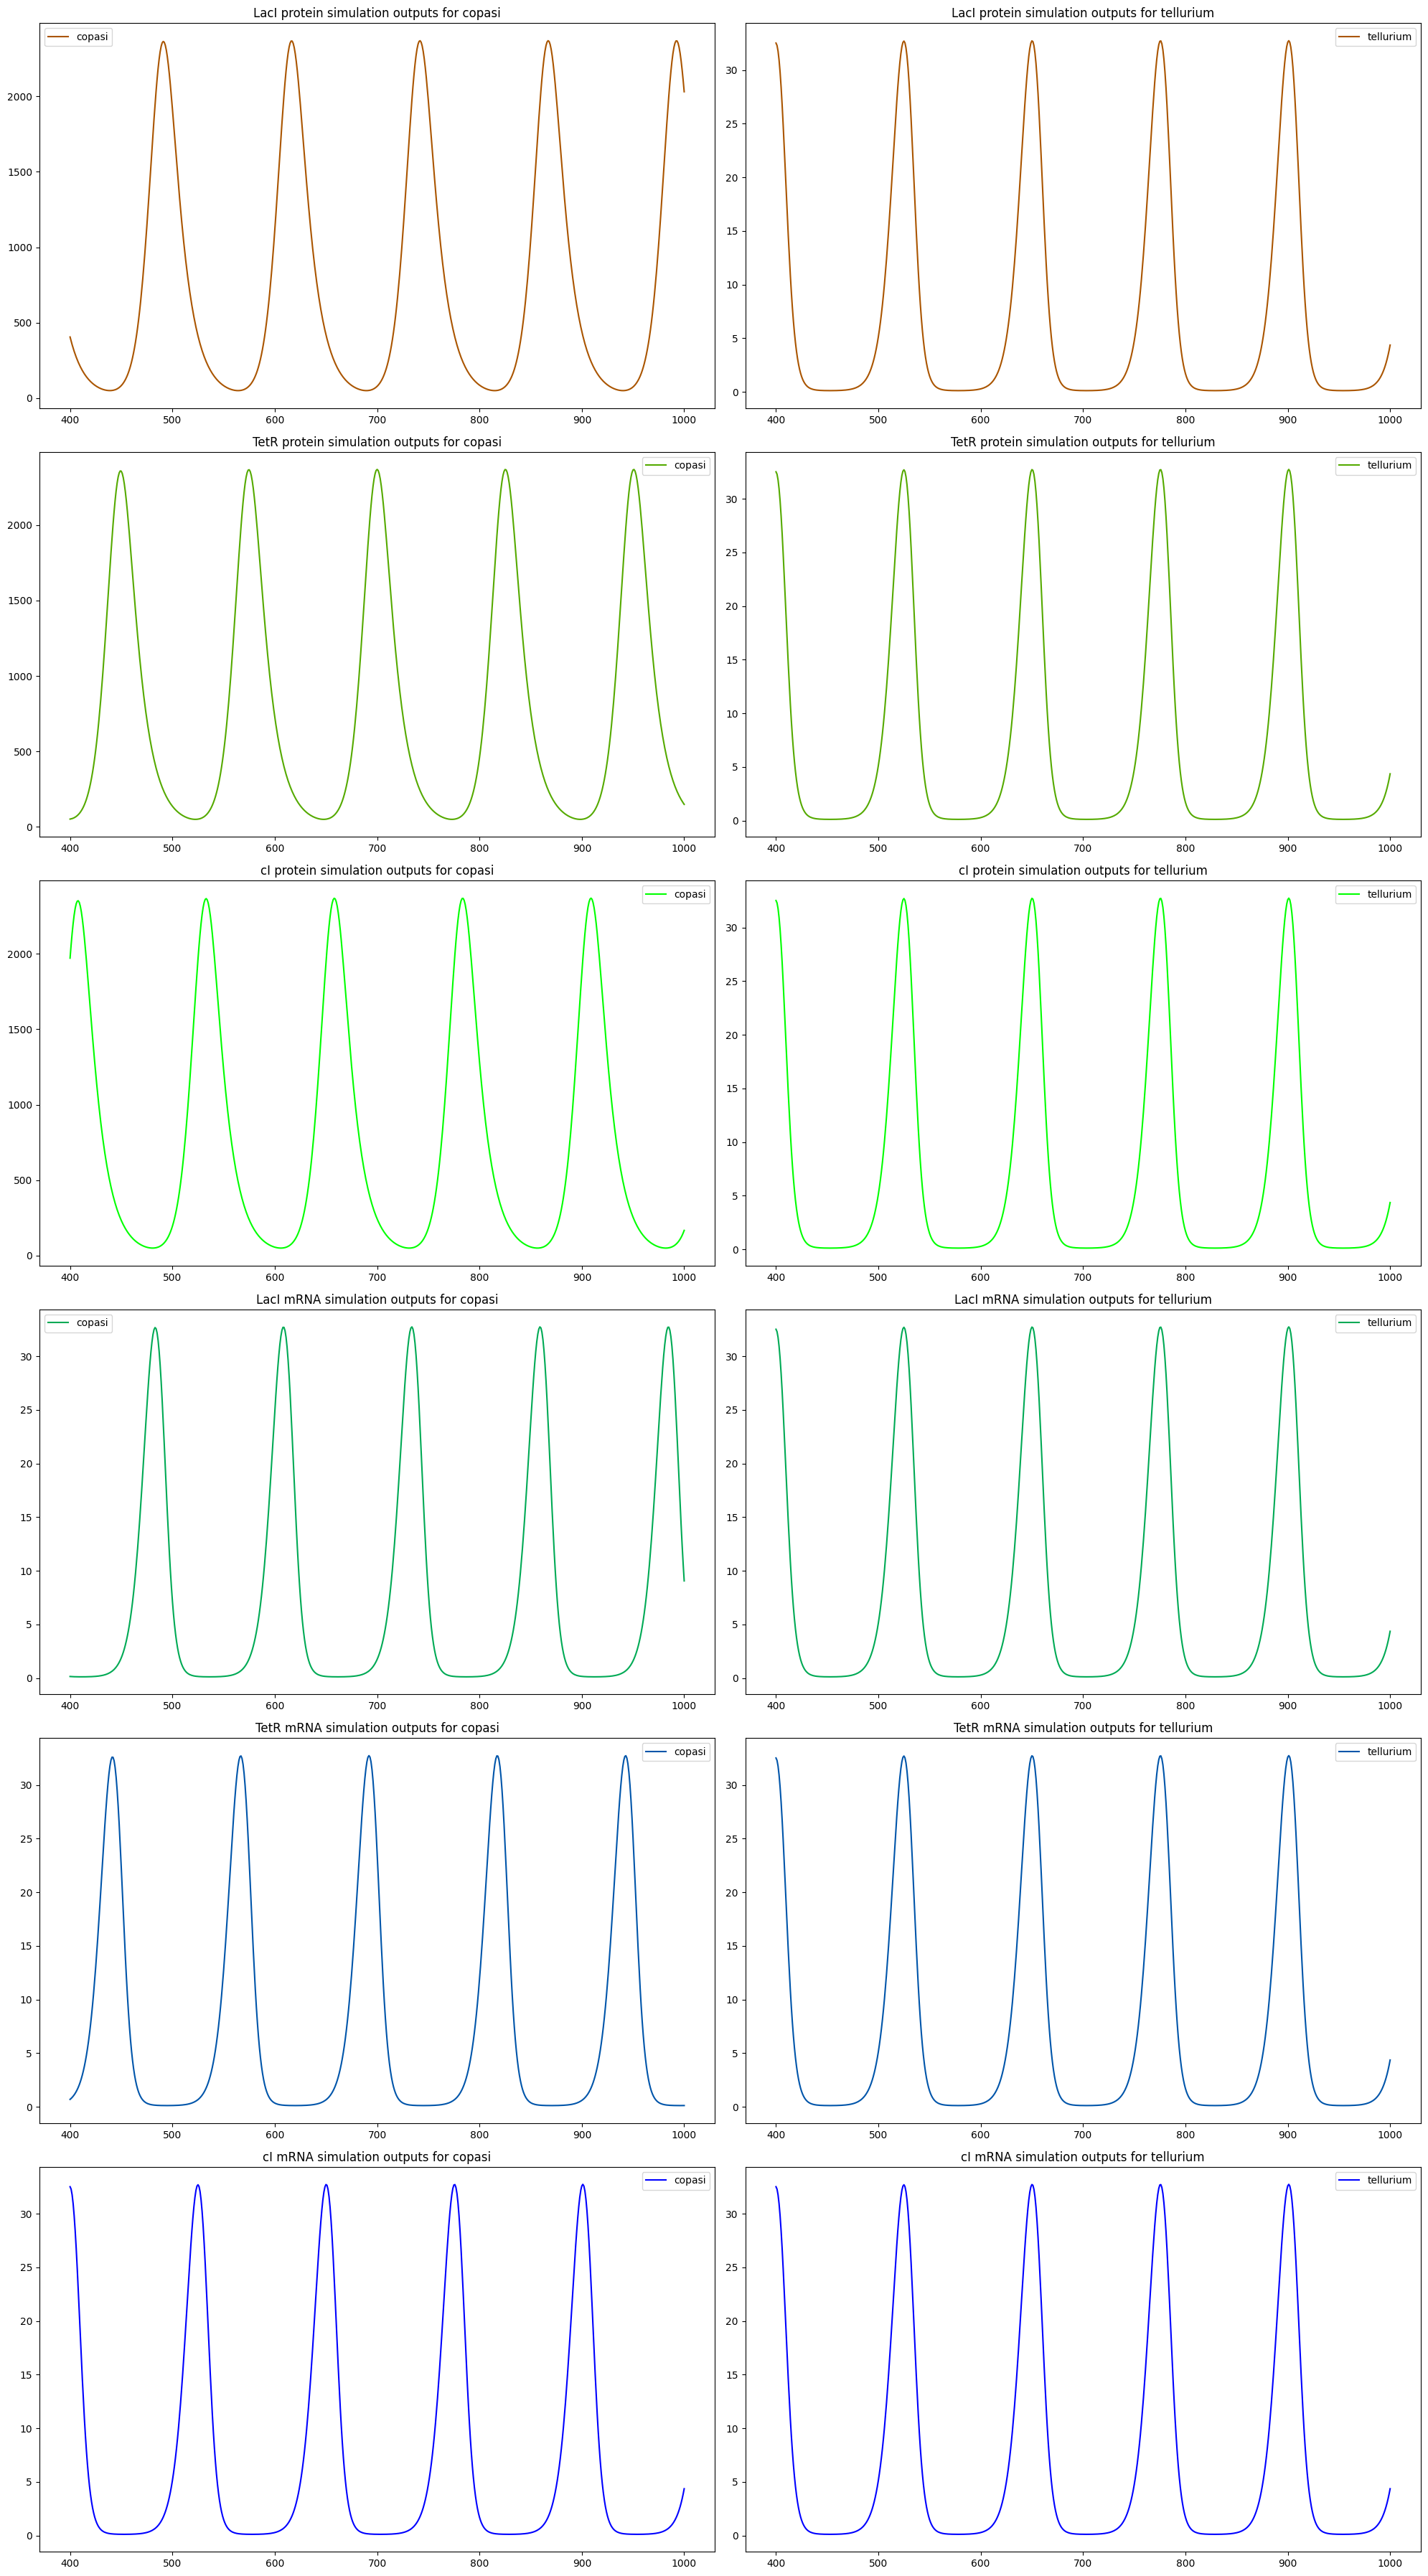

In [ ]:
output_plots_species_hue = verifier.visualize_outputs(
    data=comparison_result,
    simulators=simulators,
    output_start=output_start,
    output_end=output_end,
    num_points=num_points,
    hue='species'
)

### 4b. Plot the comparison data in the form of a heatmap.

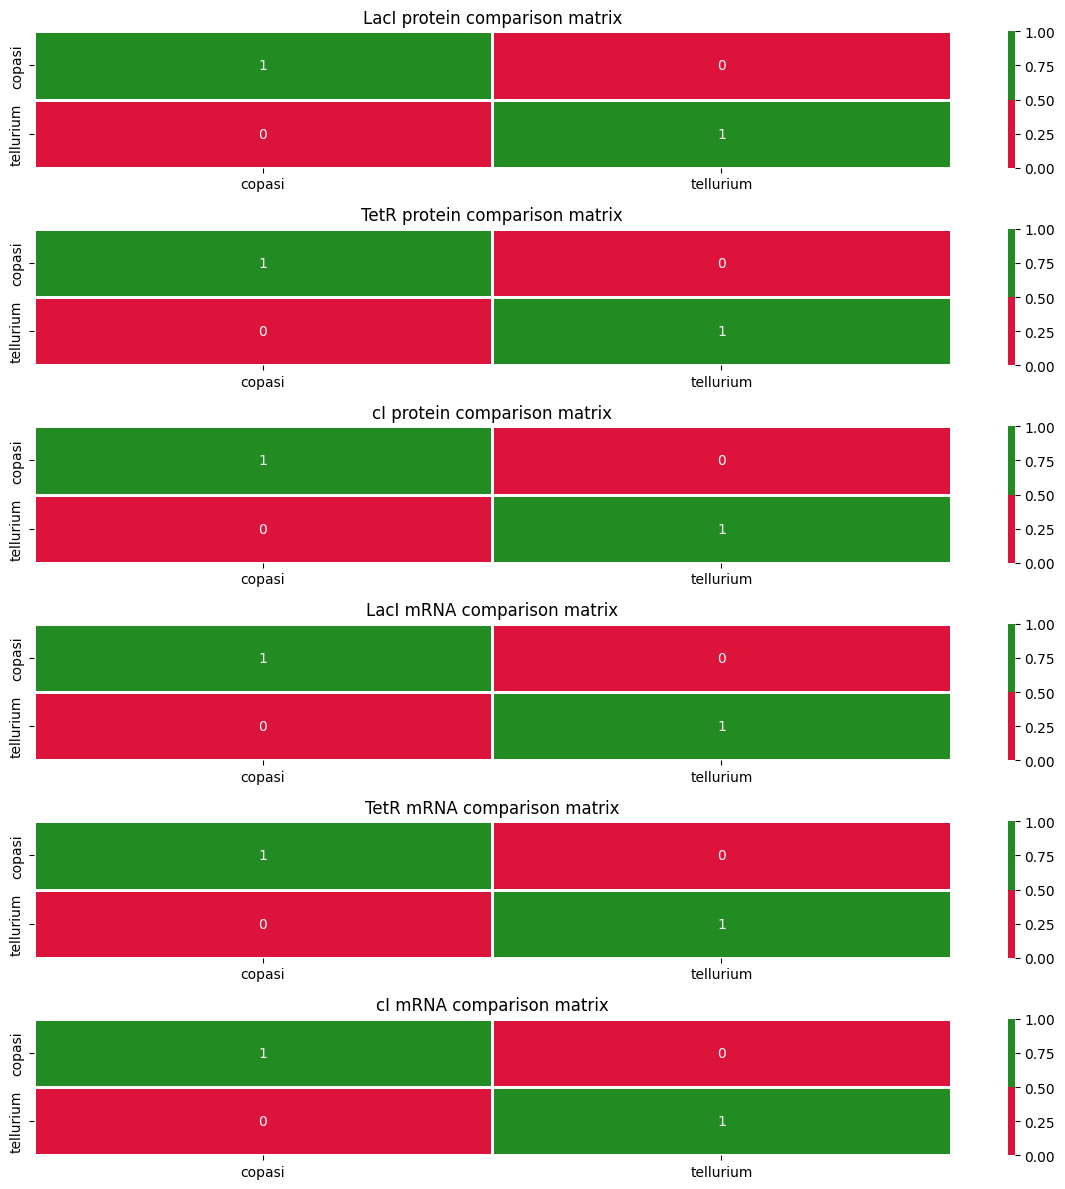

In [ ]:
comparison_plots = verifier.visualize_comparison(data=comparison_result, simulators=simulators)

### 5a. Save any generated plot with the verifier.

In [ ]:
verifier.export_plot(fig=comparison_plots, save_dest=f"/content/notebook-demo-comparison.pdf")

### 5b. Save an output plot grid

In [ ]:
verifier.export_plot(fig=output_plots_simulator_hue, save_dest=f"/content/notebook-demo-observables.pdf")

### 6a. Export data to CSV

In [ ]:
verifier.export_csv(data=comparison_result, save_dest=f"/content/notebook-demo-observables.csv", simulators=simulators)

### 6b. Read in any exported CSV file as a pandas dataframe

In [ ]:
verifier.read_observables("/content/notebook-demo-observables.csv")

,LacI protein_copasi,LacI protein_tellurium,TetR protein_copasi,TetR protein_tellurium,cI protein_copasi,cI protein_tellurium,LacI mRNA_copasi,LacI mRNA_tellurium,TetR mRNA_copasi,TetR mRNA_tellurium,cI mRNA_copasi,cI mRNA_tellurium
0,405.556530,32.524113,51.895620,32.524113,1971.270446,32.524113,0.145452,32.524113,0.689216,32.524113,32.523889,32.524113
1,379.346144,32.302734,53.318683,32.302734,2056.480504,32.302734,0.138166,32.302734,0.774587,32.302734,32.302454,32.302734
2,354.847020,31.777694,55.257876,31.777694,2133.476360,31.777694,0.132258,31.777694,0.871935,31.777694,31.777281,31.777694
3,331.952917,30.946985,57.764172,30.946985,2200.761993,30.946985,0.127480,30.946985,0.982864,30.946985,30.946407,30.946985
4,310.563213,29.818984,60.896516,29.818984,2256.962984,29.818984,0.123632,29.818984,1.109172,29.818984,29.818316,29.818984
...,...,...,...,...,...,...,...,...,...,...,...,...
596,2285.733291,2.679439,193.461304,2.679439,109.139883,2.679439,16.288641,2.679439,0.112850,2.679439,2.679961,2.679439
597,2234.854632,3.029693,181.262111,3.029693,120.941340,3.029693,14.271736,3.029693,0.113085,3.029693,3.030281,3.029693
598,2174.273909,3.423710,169.882590,3.423710,134.444280,3.423710,12.377590,3.423710,0.113662,3.423710,3.424372,3.423710
599,2105.563022,3.865997,159.270147,3.865997,149.843019,3.865997,10.633981,3.865997,0.114584,3.865997,3.866741,3.865997


### 7. Create a dataframe from the time series data generated from the above `verifier.get_verifiy_output()` calls

In [ ]:
verifier.get_observables(data=comparison_result, simulators=simulators)

,LacI protein_copasi,LacI protein_tellurium,TetR protein_copasi,TetR protein_tellurium,cI protein_copasi,cI protein_tellurium,LacI mRNA_copasi,LacI mRNA_tellurium,TetR mRNA_copasi,TetR mRNA_tellurium,cI mRNA_copasi,cI mRNA_tellurium
0,405.556530,32.524113,51.895620,32.524113,1971.270446,32.524113,0.145452,32.524113,0.689216,32.524113,32.523889,32.524113
1,379.346144,32.302734,53.318683,32.302734,2056.480504,32.302734,0.138166,32.302734,0.774587,32.302734,32.302454,32.302734
2,354.847020,31.777694,55.257876,31.777694,2133.476360,31.777694,0.132258,31.777694,0.871935,31.777694,31.777281,31.777694
3,331.952917,30.946985,57.764172,30.946985,2200.761993,30.946985,0.127480,30.946985,0.982864,30.946985,30.946407,30.946985
4,310.563213,29.818984,60.896516,29.818984,2256.962984,29.818984,0.123632,29.818984,1.109172,29.818984,29.818316,29.818984
...,...,...,...,...,...,...,...,...,...,...,...,...
596,2285.733291,2.679439,193.461304,2.679439,109.139883,2.679439,16.288641,2.679439,0.112850,2.679439,2.679961,2.679439
597,2234.854632,3.029693,181.262111,3.029693,120.941340,3.029693,14.271736,3.029693,0.113085,3.029693,3.030281,3.029693
598,2174.273909,3.423710,169.882590,3.423710,134.444280,3.423710,12.377590,3.423710,0.113662,3.423710,3.424372,3.423710
599,2105.563022,3.865997,159.270147,3.865997,149.843019,3.865997,10.633981,3.865997,0.114584,3.865997,3.866741,3.865997
